Demand forecasting for store (Seasonal ARIMAX Model)

In this kernel we predicting how much Items will be sale for 3 months( Timeseries based problem).

In [72]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows=999

In [2]:
#read train data file
data=pd.read_csv(r'C:\Users\RUSHI\Desktop\b daily practice\project\demand forecasting\train.csv')

In [3]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
data.shape

(913000, 4)

In [6]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


There are 10 stores(1 to 10) and 10 different Items(1-10)
min 0 item sale for day and max 231 item sale for day .

In [7]:
#store vs Item Vs Date
dftr_sid=pd.pivot_table(data,index=['store'],columns=['item','date'],values='sales')
dftr_sid.head(10)

item          1                                                          \
date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
store                                                                     
1             13         11         14         13         10         12   
2             12         16         16         20         16         18   
3             19          8         10         15         22         22   
4             10         12          8         15         19         14   
5             11          9         12          8         13         15   
6             20          6         11          7         12          9   
7              7          4          8          7          8         10   
8             16         10         12         21         15         27   
9             11          9         20         22         22         11   
10            14         14         16         17         12         11   

item                                               ...         50             \
date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2017-12-22 2017-12-23   
store                                              ...                         
1             10          9         12          9  ...         59         53   
2             12         11         16         10  ...         81         90   
3              7         15          9          7  ...         56         66   
4             12         16         18         16  ...         65         63   
5              6         11         13          9  ...         40         35   
6             11          9         13          9  ...         41         52   
7              6          6          3          7  ...         32         47   
8              9         10         11         14  ...         69         77   
9              7         13          9          5  ...         67         64   
10            12         19         10         17  ...         75         70   

item                                                                     \
date  2017-12-24 2017-12-25 2017-12-26 2017-12-27 2017-12-28 2017-12-29   
store                                                                     
1             67         35         42         38         52         59   
2             89         58         50         79         68         67   
3             87         54         70         52         75         68   
4             68         42         46         48         58         56   
5             62         33         38         35         39         37   
6             50         47         46         47         49         43   
7             34         27         37         33         41         44   
8             81         45         55         64         73         80   
9             66         30         54         52         73         68   
10            76         51         41         63         59         74   

item                         
date  2017-12-30 2017-12-31  
store                        
1             66         45  
2             79         73  
3             62         77  
4             66         81  
5             60         36  
6             41         45  
7             44         46  
8             70         76  
9             62         65  
10            62         82  

[10 rows x 91300 columns]

In [8]:
#store vs date vs item
dftr_sid1=pd.pivot_table(data,index=['store'],columns=['date','item'],values='sales')
dftr_sid1.head(10)

date  2013-01-01                                      ... 2017-12-31          \
item          1   2   3   4   5   6   7   8   9   10  ...         41  42  43   
store                                                 ...                      
1             13  33  15  10  11  31  25  33  18  37  ...         25  27  41   
2             12  41  19  21   4  34  39  49  28  51  ...         32  51  62   
3             19  43  26   9  13  34  40  54  28  38  ...         29  37  46   
4             10  30  17  13  10  24  26  34  19  30  ...         29  48  56   
5             11  26  14   4   9  20  21  30  21  31  ...         14  23  31   
6             20  27  13   7   4  27  14  43  25  29  ...         20  28  38   
7              7  21   9   6   5  21  21  29  27  25  ...         19  26  30   
8             16  39  21  13  10  36  30  50  29  47  ...         34  42  66   
9             11  31  20  10   9  29  30  45  27  45  ...         22  49  61   
10            14  36  18   9   8  32  32  49  23  45  ...         22  33  56   

date                                
item   44   45  46  47  48  49  50  
store                               
1      25   73  52  12  47  21  45  
2      24  115  77  24  64  44  73  
3      37  103  71  26  59  25  77  
4      37   68  63  25  42  30  81  
5      22   61  35  18  46  21  36  
6      24   58  50  20  32  21  45  
7      23   58  35  12  34  12  46  
8      38   92  79  23  64  40  76  
9      29   88  73  29  46  29  65  
10     40   89  70  22  60  42  82  

[10 rows x 91300 columns]

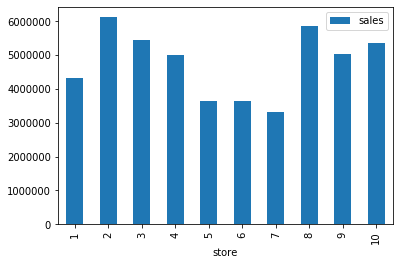

In [9]:
#storewise sale 
sd=data.groupby(['store']).sales.sum()
sd.plot(kind='bar',legend="Sum")

Store no 2 and 8 have maximum sale of items where store 7 has min sale

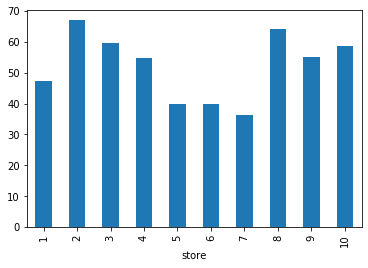

In [10]:
#storewise Average sale 
sd=data.groupby(['store']).sales.mean()
sd.plot(kind='bar')

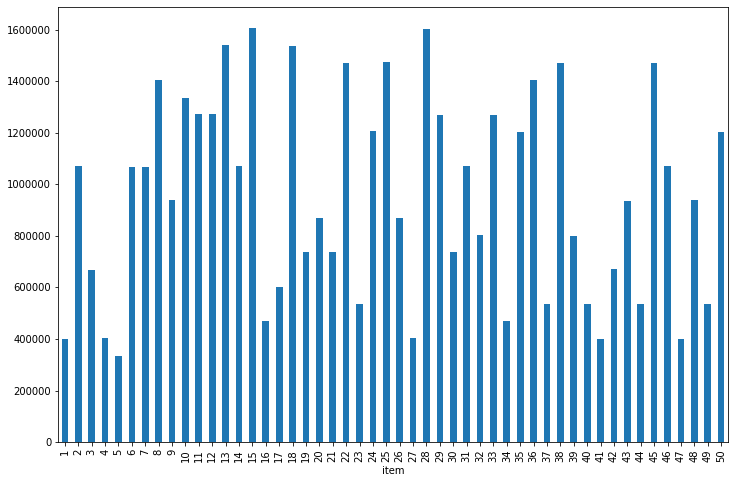

In [12]:
#itemwise Sales
ids=data.groupby(['item']).sales.sum()
plt.figure(figsize=(12,8))
ids.plot(kind='bar')

item category 16 and 28 sale mostly and item 5 sale very rarely

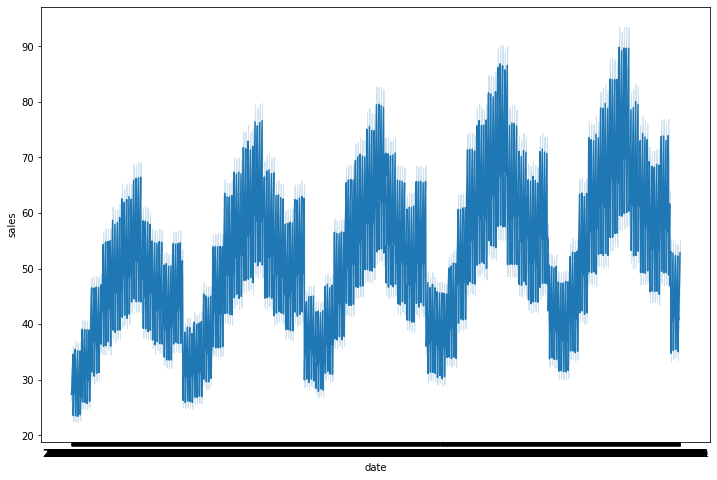

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="sales",legend = 'full' , data=data)

In [14]:
#split date into day,month,week and year
data['date']=pd.to_datetime(data['date'])
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.dayofyear
data['weekday']=data['date'].dt.weekday

In [15]:
data.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


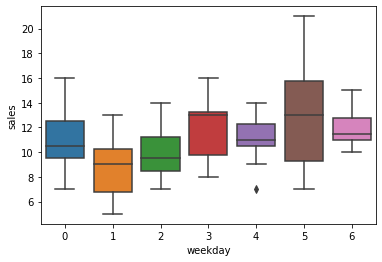

In [16]:
sns.boxplot(x="weekday",y="sales",data=data[:56])#check for 2 month data 0-monday....6-sunday

maximum sale of items on saturday 

In [17]:
data.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [19]:
#covnvert to date time format(datatype)
data['date']=pd.to_datetime(data['date'])

In [20]:
data.set_index('date',inplace=True)

In [21]:
data.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5


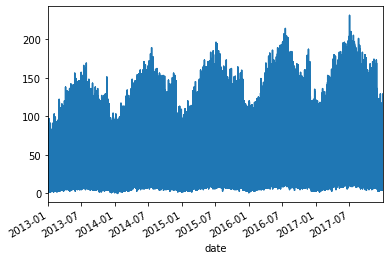

In [22]:
data['sales'].plot()

In [23]:
data.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5


Working with data where item id=1 and store id=1

In [24]:
buf = data[(data.item==1)&(data.store==1)].copy()

In [26]:
#stationarity check function
from statsmodels.tsa.stattools import adfuller

In [27]:
def temp(sale):
    result=adfuller(sale)
    print("ADF : "+str(result[0]))
    print("P-value : "+str(result[1]))
    if result[1]<=0.05:
        print("Stationary")
    else:
        print("non-Stationary")

In [28]:
temp(buf['sales'])

ADF : -3.1576705563328
P-value : 0.02256938062657181
Stationary


In [30]:
tr_start,tr_end = '2014-01-01','2017-09-30'
tra = buf['sales'][tr_start:tr_end].dropna()

In [32]:
#find p,d and q
import statsmodels.api as sm

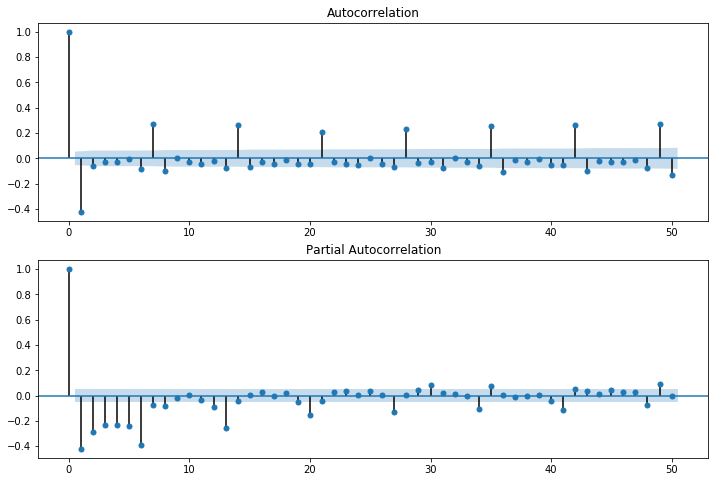

In [33]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax2)


In [44]:
#p=7,d=1,q=7

In [35]:
model=sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(7,1,7,1)).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             sales   No. Observations:                 1369
Model:             SARIMAX(7, 1, 7)x(7, 1, 7, 1)   Log Likelihood               -4119.144
Date:                           Fri, 19 Jun 2020   AIC                           8296.289
Time:                                   11:03:55   BIC                           8447.680
Sample:                               01-01-2014   HQIC                          8352.949
                                    - 09-30-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9628   7648.942     -0.000      1.000    -1.5e+04     1.5e+04
ar.L2         -0.9509   2468.714     -0.000      1.000   -4839.542    4837.640
ar.L3         -0.9398   4711.712     -0.000      1.000   -9235.726    9233.846
ar.L4         -0.9664   3759.232     -0.000      1.000   -7368.925    7366.992
ar.L5         -0.9371   5516.191     -0.000      1.000   -1.08e+04    1.08e+04
ar.L6         -0.9211   2515.307     -0.000      1.000   -4930.832    4928.990
ar.L7          0.0080    164.571   4.86e-05      1.000    -322.545     322.561
ma.L1          0.0167    939.856   1.78e-05      1.000   -1842.067    1842.100
ma.L2          0.0208    670.126    3.1e-05      1.000   -1313.403    1313.444
ma.L3          0.0224    605.971   3.69e-05      1.000   -1187.660    1187.705
ma.L4          0.0974    892.373      0.000      1.000   -1748.922    1749.117
ma.L5         -0.0019    445.990  -4.31e-06      1.000    -874.126     874.122
ma.L6          0.0406    578.012   7.02e-05      1.000   -1132.842    1132.923
ma.L7         -0.8400    875.223     -0.001      0.999   -1716.246    1714.566
ar.S.L1       -0.9628   7648.913     -0.000      1.000    -1.5e+04     1.5e+04
ar.S.L2       -0.9509   2468.712     -0.000      1.000   -4839.537    4837.635
ar.S.L3       -0.9398   4711.738     -0.000      1.000   -9235.777    9233.898
ar.S.L4       -0.9664   3759.275     -0.000      1.000   -7369.011    7367.078
ar.S.L5       -0.9371   5516.200     -0.000      1.000   -1.08e+04    1.08e+04
ar.S.L6       -0.9211   2515.259     -0.000      1.000   -4930.738    4928.895
ar.S.L7        0.0080    164.575   4.86e-05      1.000    -322.553     322.569
ma.S.L1        0.0167    939.845   1.78e-05      1.000   -1842.045    1842.078
ma.S.L2        0.0207    670.160    3.1e-05      1.000   -1313.468    1313.510
ma.S.L3        0.0224    606.012   3.69e-05      1.000   -1187.739    1187.784
ma.S.L4        0.0974    892.379      0.000      1.000   -1748.933    1749.128
ma.S.L5       -0.0019    445.971  -4.28e-06      1.000    -874.089     874.085
ma.S.L6        0.0406    578.018   7.02e-05      1.000   -1132.854    1132.935
ma.S.L7       -0.8400    875.253     -0.001      0.999   -1716.305    1714.625
sigma2        22.5565      0.821     27.467      0.000      20.947      24.166
===================================================================================
Ljung-Box (Q):                       44.53   Jarque-Bera (JB):                 7.58
Prob(Q):                              0.29   Prob(JB):                         0.02
Heteroskedasticity (H):               1.30   Skew:                             0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
te_start,te_end = '2017-10-01','2017-12-31'
tes = buf['sales'][te_start:te_end].dropna()

In [37]:
from sklearn.metrics import mean_squared_error
pred = model.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMA model MSE:30.067089829668145


In [38]:
tra.index[-1]

Timestamp('2017-09-30 00:00:00')

In [39]:
from pandas.tseries.offsets import DateOffset
fu_date=[tra.index[-1]+DateOffset(months=x) for x in range(0,90)]

In [40]:
fdf=pd.DataFrame(index=fu_date[1:])

In [41]:
fd=pd.concat([tra,fdf])

In [42]:
tra.shape

(1369,)

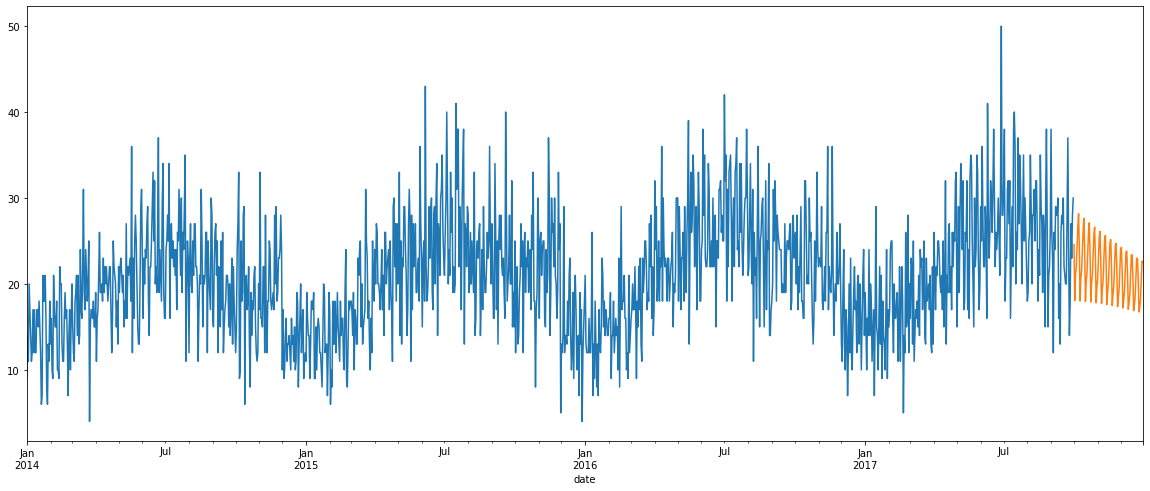

In [43]:
fd=model.predict(start=1369,end=1459,dynamic=True)
plt.figure(figsize=(20,8))
tra.plot()
fd.plot()
plt.show()


In [73]:
fd

2017-10-01    24.577476
2017-10-02    18.057054
2017-10-03    21.026184
2017-10-04    21.949205
2017-10-05    24.227905
2017-10-06    26.580826
2017-10-07    28.166092
2017-10-08    24.200188
2017-10-09    18.016437
2017-10-10    20.681856
2017-10-11    21.617601
2017-10-12    23.930976
2017-10-13    26.300599
2017-10-14    27.631497
2017-10-15    23.849106
2017-10-16    17.960884
2017-10-17    20.343710
2017-10-18    21.290922
2017-10-19    23.630820
2017-10-20    26.008445
2017-10-21    27.111893
2017-10-22    23.501837
2017-10-23    17.890867
2017-10-24    20.011435
2017-10-25    20.968882
2017-10-26    23.327468
2017-10-27    25.705511
2017-10-28    26.606303
2017-10-29    23.158015
2017-10-30    17.807157
2017-10-31    19.684717
2017-11-01    20.651161
2017-11-02    23.021009
2017-11-03    25.392871
2017-11-04    26.113780
2017-11-05    22.817297
2017-11-06    17.710527
2017-11-07    19.363244
2017-11-08    20.337420
2017-11-09    22.711572
2017-11-10    25.071532
2017-11-11    25

In [ ]:
#working with resample data

In [45]:
data.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5


In [90]:
resample_monthly_temp = buf['sales'].resample('MS').mean()#resample data

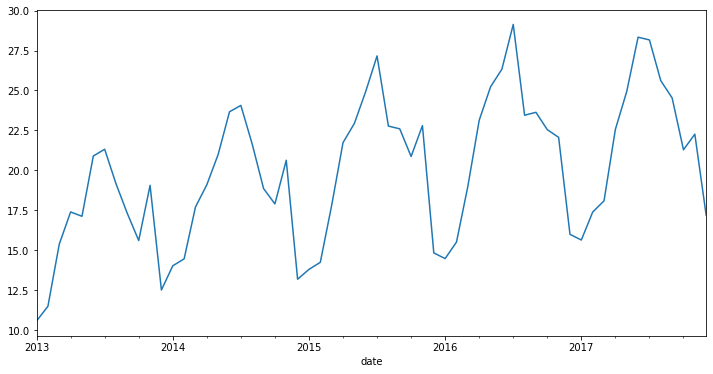

In [91]:
resample_monthly_temp.plot(figsize=(12,6))

In [92]:
#check for stationarity
temp(resample_monthly_temp)

ADF : -4.051321644240125
P-value : 0.0011643777601817104
Stationary


In [93]:
buf.shape

(1826, 7)

In [94]:
resample_monthly_temp

date
2013-01-01    10.580645
2013-02-01    11.500000
2013-03-01    15.387097
2013-04-01    17.400000
2013-05-01    17.129032
2013-06-01    20.900000
2013-07-01    21.322581
2013-08-01    19.161290
2013-09-01    17.300000
2013-10-01    15.612903
2013-11-01    19.066667
2013-12-01    12.516129
2014-01-01    14.032258
2014-02-01    14.464286
2014-03-01    17.709677
2014-04-01    19.100000
2014-05-01    21.000000
2014-06-01    23.666667
2014-07-01    24.064516
2014-08-01    21.645161
2014-09-01    18.866667
2014-10-01    17.903226
2014-11-01    20.633333
2014-12-01    13.193548
2015-01-01    13.806452
2015-02-01    14.250000
2015-03-01    17.806452
2015-04-01    21.733333
2015-05-01    22.935484
2015-06-01    24.933333
2015-07-01    27.161290
2015-08-01    22.774194
2015-09-01    22.600000
2015-10-01    20.870968
2015-11-01    22.800000
2015-12-01    14.838710
2016-01-01    14.483871
2016-02-01    15.517241
2016-03-01    19.000000
2016-04-01    23.133333
2016-05-01    25.225806
2016-06-01 

In [95]:
resample_monthly_temp.shape

(60,)

In [96]:
#train Seasonal Arimax model
model2=sm.tsa.statespace.SARIMAX(resample_monthly_temp,order=(7,1,7),seasonal_order=(7,1,[],7),m=12)
mf2=model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


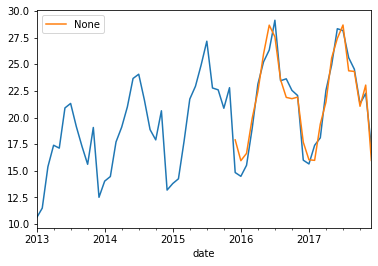

In [97]:
predictions = mf2.predict(start=35, end=59)
resample_monthly_temp.plot()
predictions.plot(legend=True)

In [98]:
forcast=mf2.predict(len(resample_monthly_temp)-1,len(resample_monthly_temp)+12)

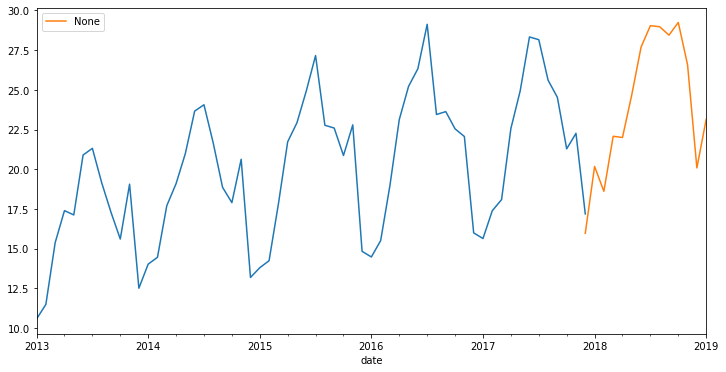

In [99]:

resample_monthly_temp.plot(figsize=(12,6))
forcast.plot(legend=True)

In [100]:
forcast

2017-12-01    15.975202
2018-01-01    20.180415
2018-02-01    18.617484
2018-03-01    22.080364
2018-04-01    22.005582
2018-05-01    24.693197
2018-06-01    27.697104
2018-07-01    29.042052
2018-08-01    28.976680
2018-09-01    28.446534
2018-10-01    29.245235
2018-11-01    26.577938
2018-12-01    20.087591
2019-01-01    23.144320
Freq: MS, dtype: float64

In [70]:
buf.head(20)

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5
2013-01-06,1,1,12,2013,1,6,6
2013-01-07,1,1,10,2013,1,7,0
2013-01-08,1,1,9,2013,1,8,1
2013-01-09,1,1,12,2013,1,9,2
